# DETECCIÓN DE FRAUDE FELIPE

### FASE 1:
Comenzamos el ejercicio definiendo un objetivo, en este caso, nuestro objetivo es predecir si un cliente es fraudulento o no.

### FASE 2: 

Introducción al Dataset de Detección de Fraude en Tarjetas de Crédito

El dataset de detección de fraude en tarjetas de crédito, disponible en Kaggle, es una colección de transacciones de tarjetas de crédito realizadas en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos contiene un total de 284,807 transacciones, de las cuales solo 492 (0.172%) son fraudulentas, lo que destaca un problema de clasificación altamente desbalanceado.

Características de los Valores Recogidos

El dataset incluye las siguientes características:

V1 a V28: Variables anónimas resultantes de una transformación PCA (Análisis de Componentes Principales) para proteger la confidencialidad de los datos. Estas variables contienen información reducida y combinada sobre las transacciones originales.

Amount: Monto de la transacción, que puede ser útil para el modelado dependiente del contexto económico.

Time: Tiempo transcurrido en segundos desde la primera transacción en el conjunto de datos.
Class: Variable objetivo donde 1 indica una transacción fraudulenta y 0 indica una transacción legítima.


Propósito y Utilidad del Modelo

El propósito de crear un modelo de machine learning para la detección de fraude en tarjetas de crédito es identificar transacciones fraudulentas de manera eficaz. Este tipo de modelo es crucial para:

Reducir Pérdidas Financieras: Al detectar y prevenir transacciones fraudulentas, las instituciones financieras pueden reducir significativamente las pérdidas económicas.
Mejorar la Seguridad del Usuario: Proteger a los usuarios de fraudes aumenta la confianza en el uso de tarjetas de crédito.
Eficiencia Operativa: Automatizar la detección de fraudes ayuda a minimizar el tiempo y los recursos necesarios para identificar actividades fraudulentas.
En resumen, la creación de un modelo predictivo de fraude es esencial para mitigar riesgos, asegurar transacciones y optimizar la respuesta ante actividades sospechosas.


In [22]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Cargamos el conjunto de datos
filename = "../data/creditcard.csv"
data = pd.read_csv(filename)

In [3]:
#Visualizamos las primeras 10 filas del Dataset
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Es útil echar un vistazo a las primeras filas del conjunto de datos para verificar que e se ha cargado correctamente y para tener una idea de los tipos de variables con las que estamos trabajando.

In [4]:
#Se ve un breve resumen de la información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Con este resumen podemos ver que todas las columnas están completas y el tipo de varibale de cada columna. Se puede ver que todas las variables son reales excepto la clase que es tipo pero entero pero en realidad es de tipo clase, cuando vale 0 es que no es fraude y si es 1 se trata de una transacción fraudulenta.

In [5]:
#Comprobamos si hay algún valor nulo en cada columna
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Podemos ver que no hay ningún valor nulo en el conjunto de datos.

Comprobemos si hay algún dato complicado. Eliminar elementos duplicados en una base de datos es una práctica común y a menudo necesaria en el análisis de datos, incluida la detección de fraude. Los duplicados pueden sesgar los resultados y llevar a conclusiones incorrectas.

In [6]:
#Comprobamos si hay algún dato duplicado
print("Datos duplicados:",data.duplicated().sum())

Datos duplicados: 1081


Como se puede ver en el dataset se tienen 1081 datos duplicados. En la detección de fraude, eliminar duplicados puede ser crucial para evitar la contabilización doble de eventos fraudulentos.

In [7]:
data = data.drop_duplicates()

In [8]:
#Veamos una breve descripción numérica de los datos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


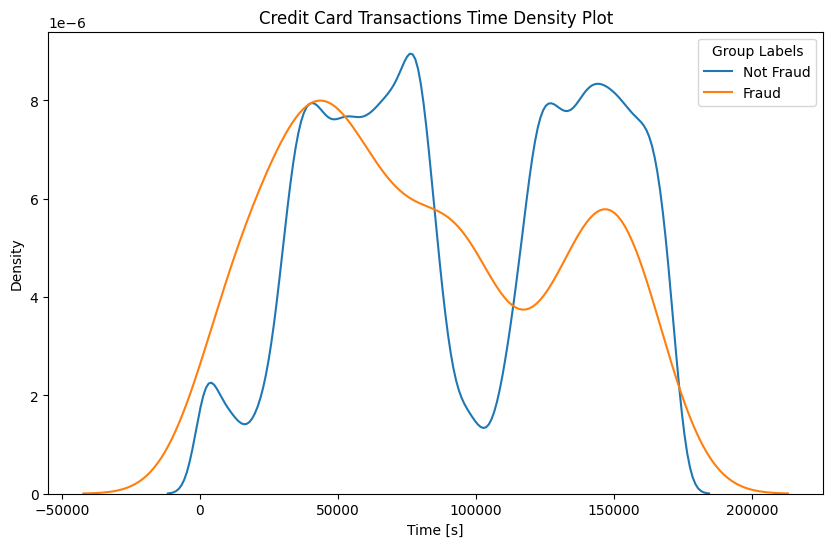

In [24]:
legit = data.loc[data['Class']==0]["Time"]
fraud = data.loc[data['Class']==1]["Time"]

hist_data = [legit, fraud]
group_labels = ['Not Fraud', 'Fraud']

# Crear la gráfica de densidad con Seaborn
plt.figure(figsize=(10, 6))
for data, label in zip(hist_data, group_labels):
    sns.kdeplot(data, label=label)

# Configuración de la gráfica
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.legend(title='Group Labels')

# Mostrar la gráfica
plt.show()

In [31]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


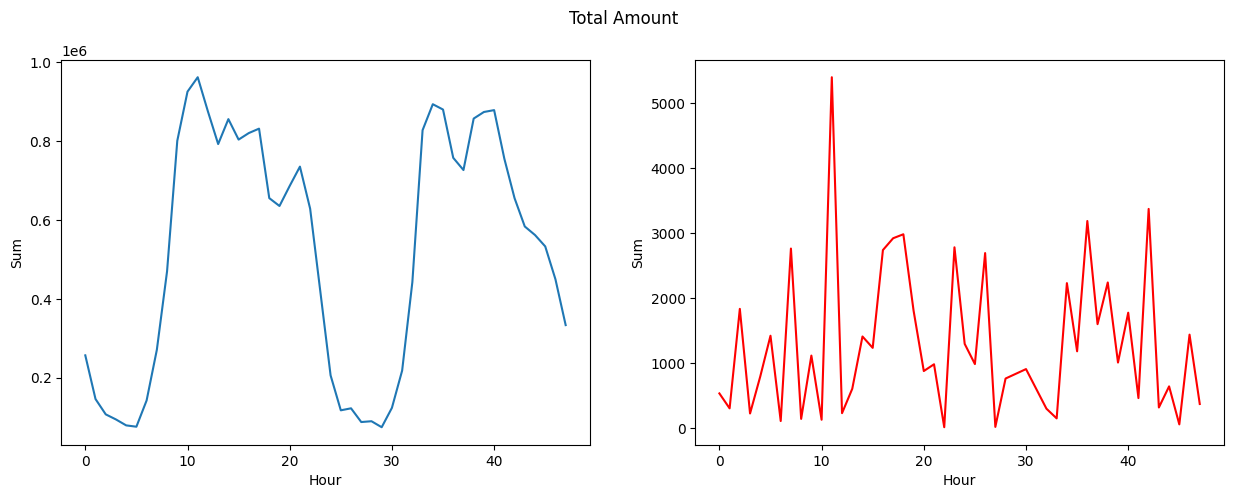

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()


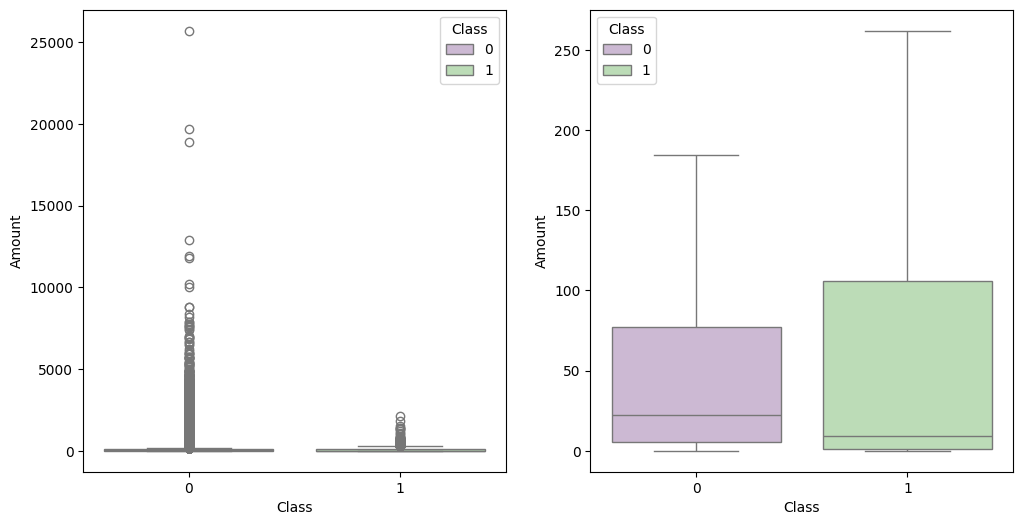

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show()

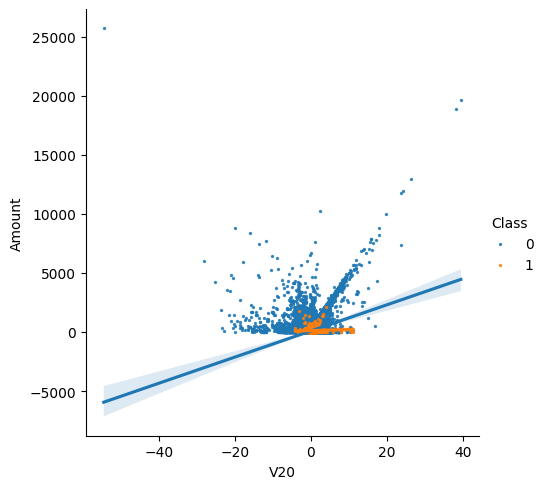

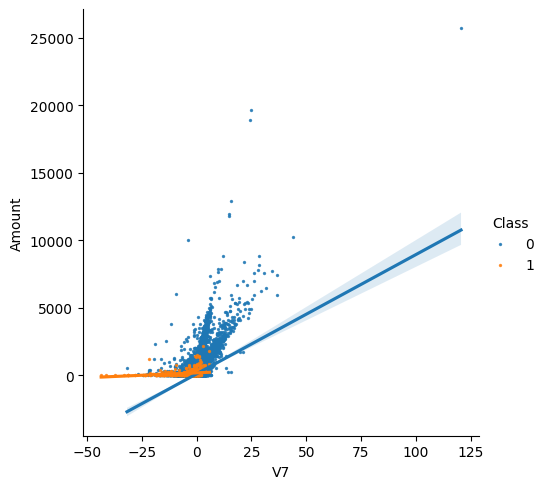

In [42]:
s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

<Figure size 640x480 with 0 Axes>

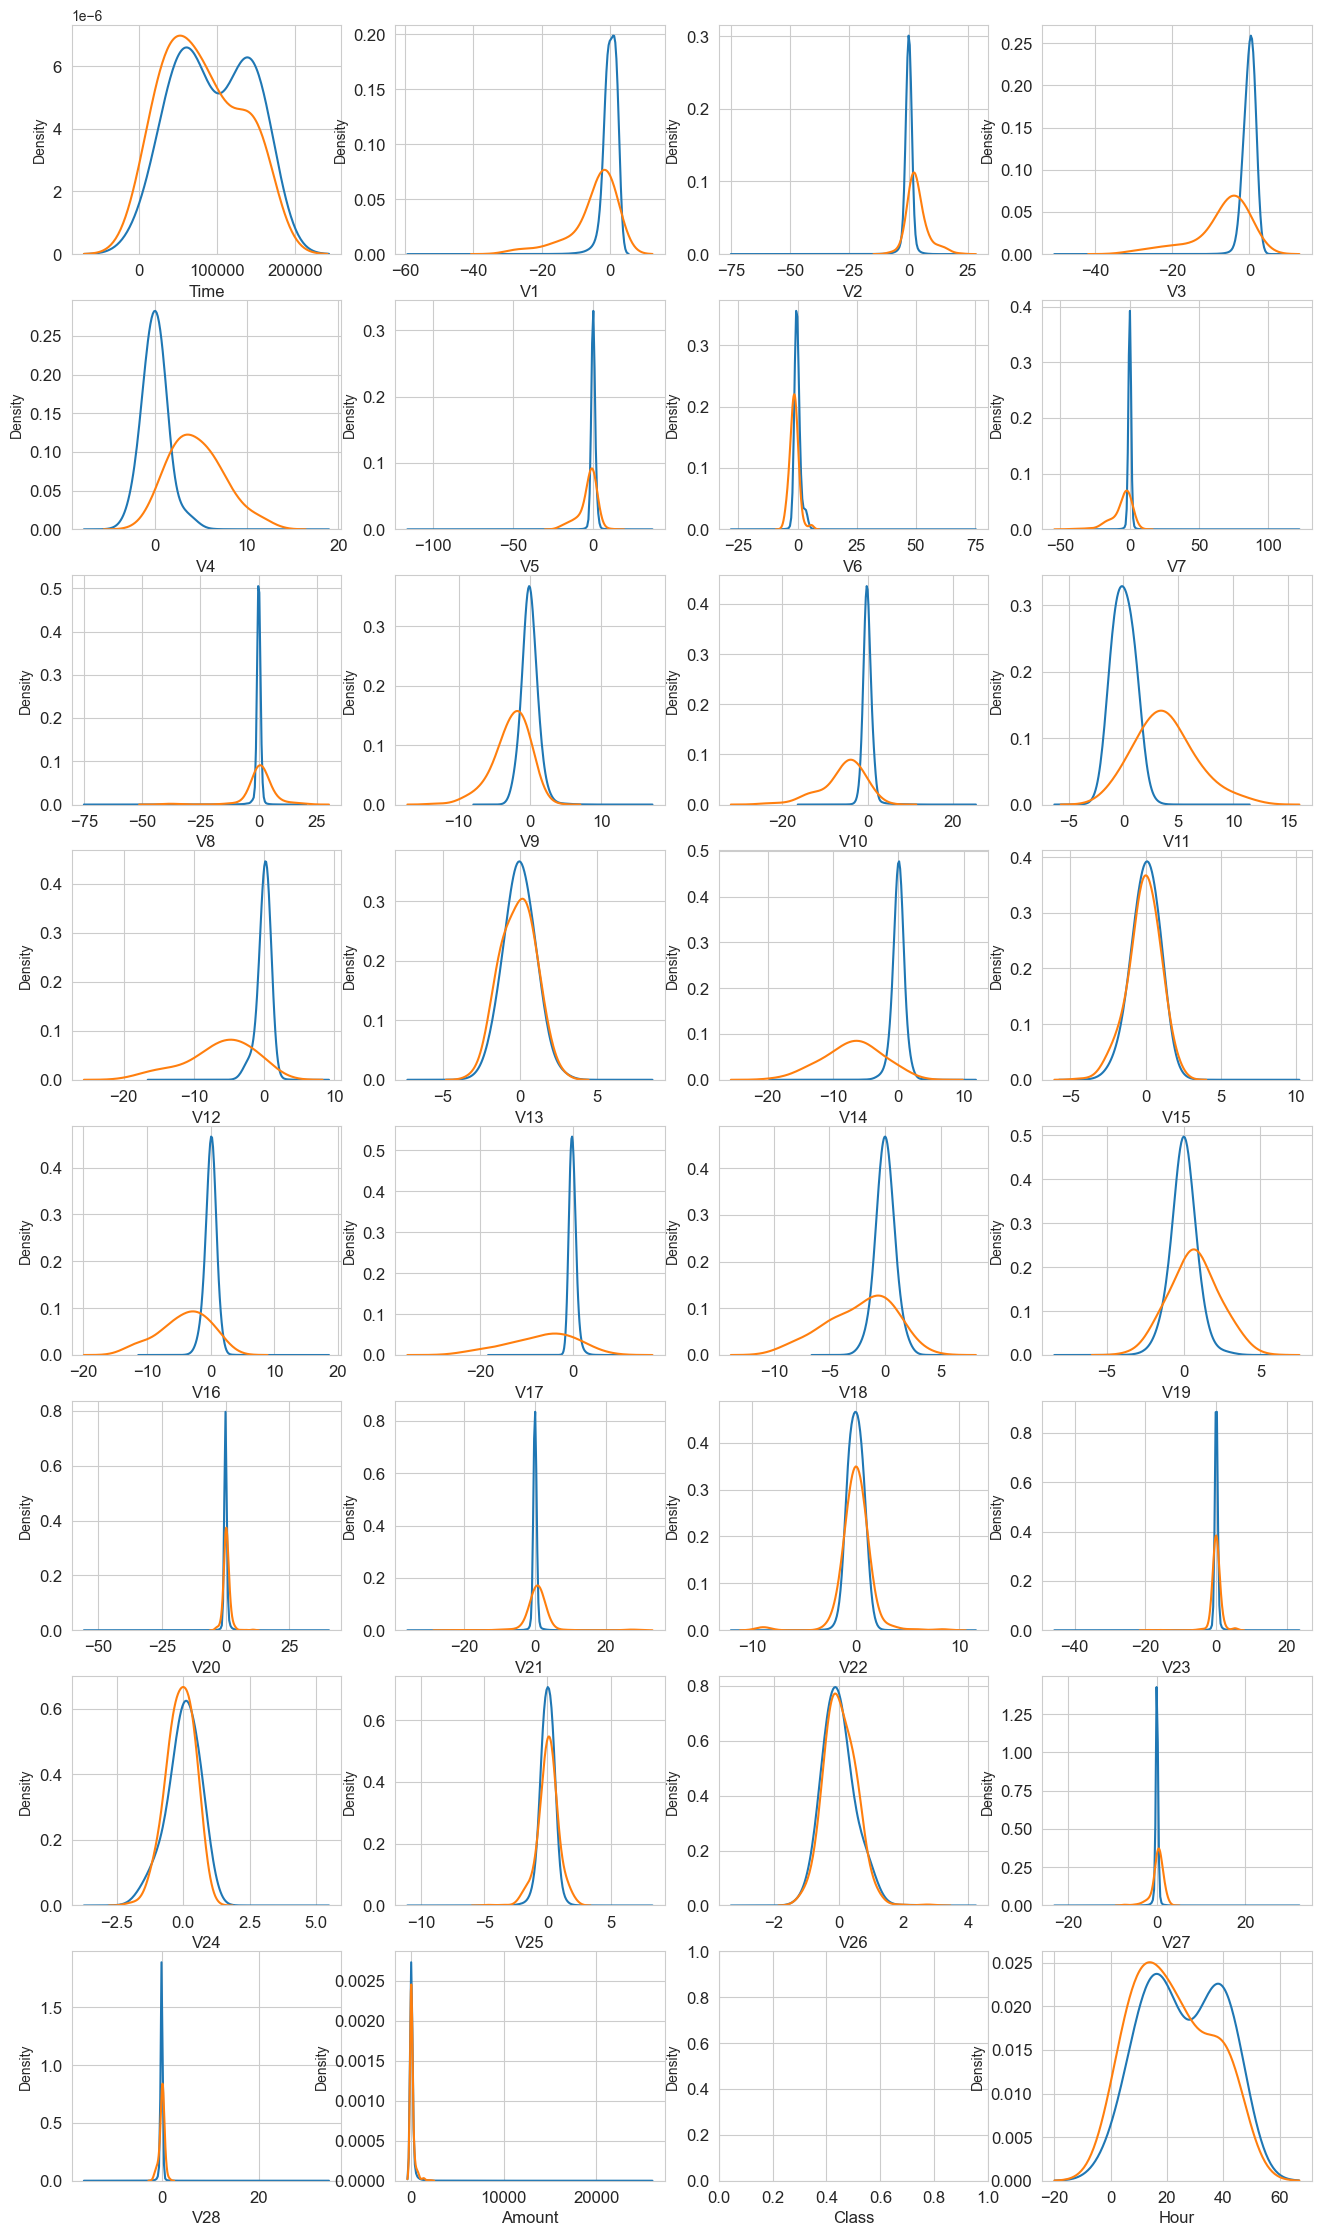

In [44]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Visualizamos la distribución de esta variable Class.


Distribución de clases:
 Class
0    283253
1       473
Name: count, dtype: int64


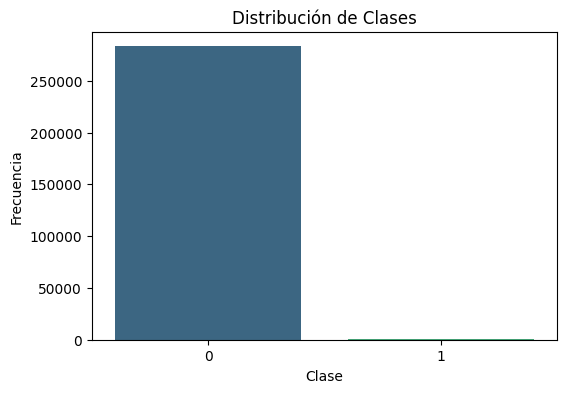

In [19]:
# 4. Distribución de clases
class_counts = data['Class'].value_counts()
print("\nDistribución de clases:\n", class_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

Tras analizar la distribución de "class" se observa un claro desequilibrio significativo en las clases. Este desequilibrio se refiere a la diferencia en la cantidad de observaciones entre las dos clases de nuestra variable objetivo: ‘Fraude’ y ‘No Fraude’. En este caso, parece que la cantidad de clientes fraudulentos es mucho menor en comparación con los clientes no fraudulentos, como suele ocurrir en la vida real.

Este desequilibrio de clases puede ser problemático para nuestro modelo de clasificación binaria. Los modelos de aprendizaje automático tienden a tener un rendimiento óptimo cuando las clases objetivo están equilibradas. Sin embargo, cuando una clase está sobrerrepresentada, como en este caso, el modelo puede ser sesgado hacia esa clase, lo que resulta en una mala clasificación de la clase minoritaria, en este caso, los fraudes.

Para abordar este problema, tendremos que aplicar técnicas de balanceo de clases más adelante en nuestro proceso de modelado. Existen varias técnicas para manejar el desequilibrio de clases, como el sobremuestreo de la clase minoritaria, el submuestreo de la clase mayoritaria, o el uso de métodos de balanceo sintético como SMOTE. Esta última será la técnica que me decidí a utilizar más adelante.

Es importante recordar que el balanceo de clases es un paso crucial en la preparación de nuestros datos para el modelado. Al garantizar que nuestras clases objetivo estén equilibradas, podemos mejorar la capacidad de nuestro modelo para generalizar y hacer predicciones precisas para ambas clases.

### FASE 3: Visualización de datos
Ahora que hemos realizado un análisis preliminar de nuestro conjunto de datos y hemos entendido las características básicas, el siguiente paso en nuestro proceso de análisis exploratorio de datos es la visualización de datos. 

La visualización de datos es una técnica poderosa que nos permite entender las relaciones, patrones y tendencias en los datos de una manera más intuitiva y visual. También nos permite comunicar eficazmente nuestros hallazgos a otros. A través de gráficos y diagramas, podemos presentar información compleja de una manera que es fácil de entender y asimilar.

En este apartado, vamos a utilizar diversas técnicas de visualización para explorar nuestras variables. Vamos a empezar con gráficos univariados, que nos permitirán entender la distribución y la variabilidad de nuestras variables individuales. Luego, pasaremos a gráficos bivariados y multivariados, que nos permitirán entender las relaciones entre las variables y cómo estas relaciones pueden afectar a nuestra variable objetivo, ‘Fraude’.

Comenzaremos haciendo un histograma para cada una de las columnas que no son categóricas. Para ello definiremos una función y la utilizaremos para dibujar cada histograma en cada una de las celdas de la matriz.

A continuación, procederemos de la misma manera a hacer unas graficas de densidad.

Para dibujar esta gráficas he creado una lista con las columnas en específico que quiero visualizar.

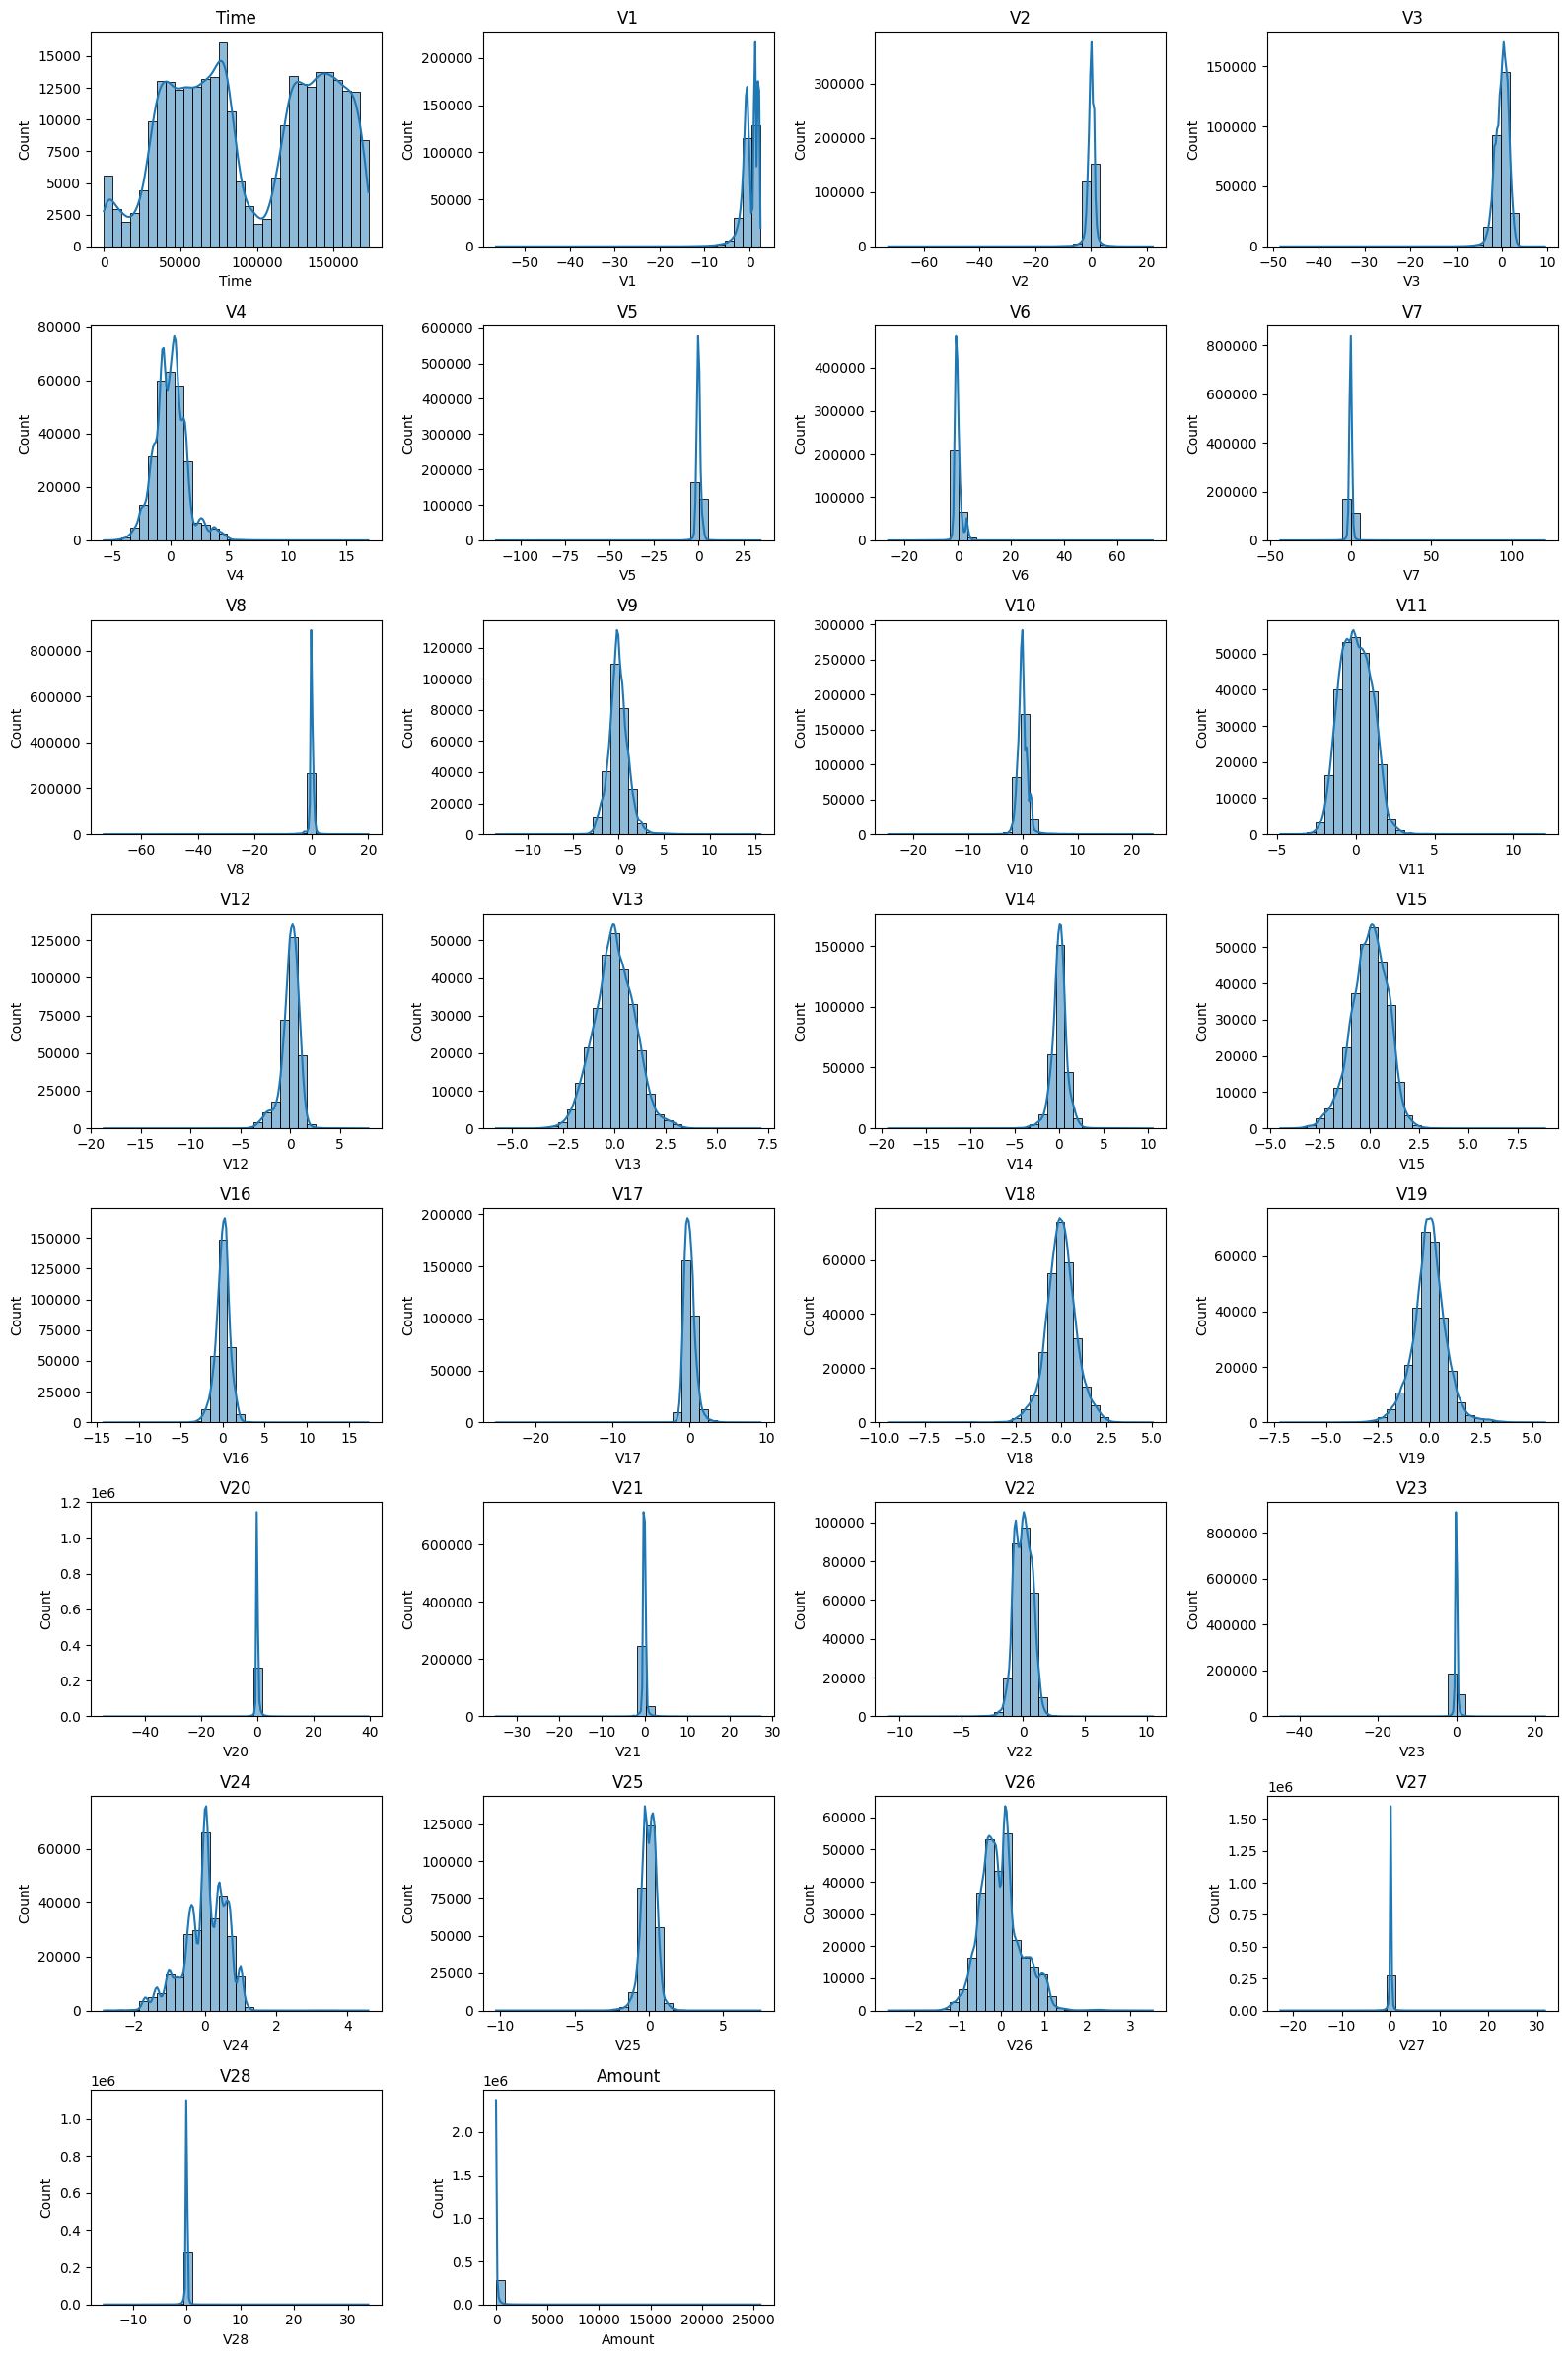

In [20]:
# 1. Distribución de variables
plt.figure(figsize=(16, 24))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(8, 4, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()


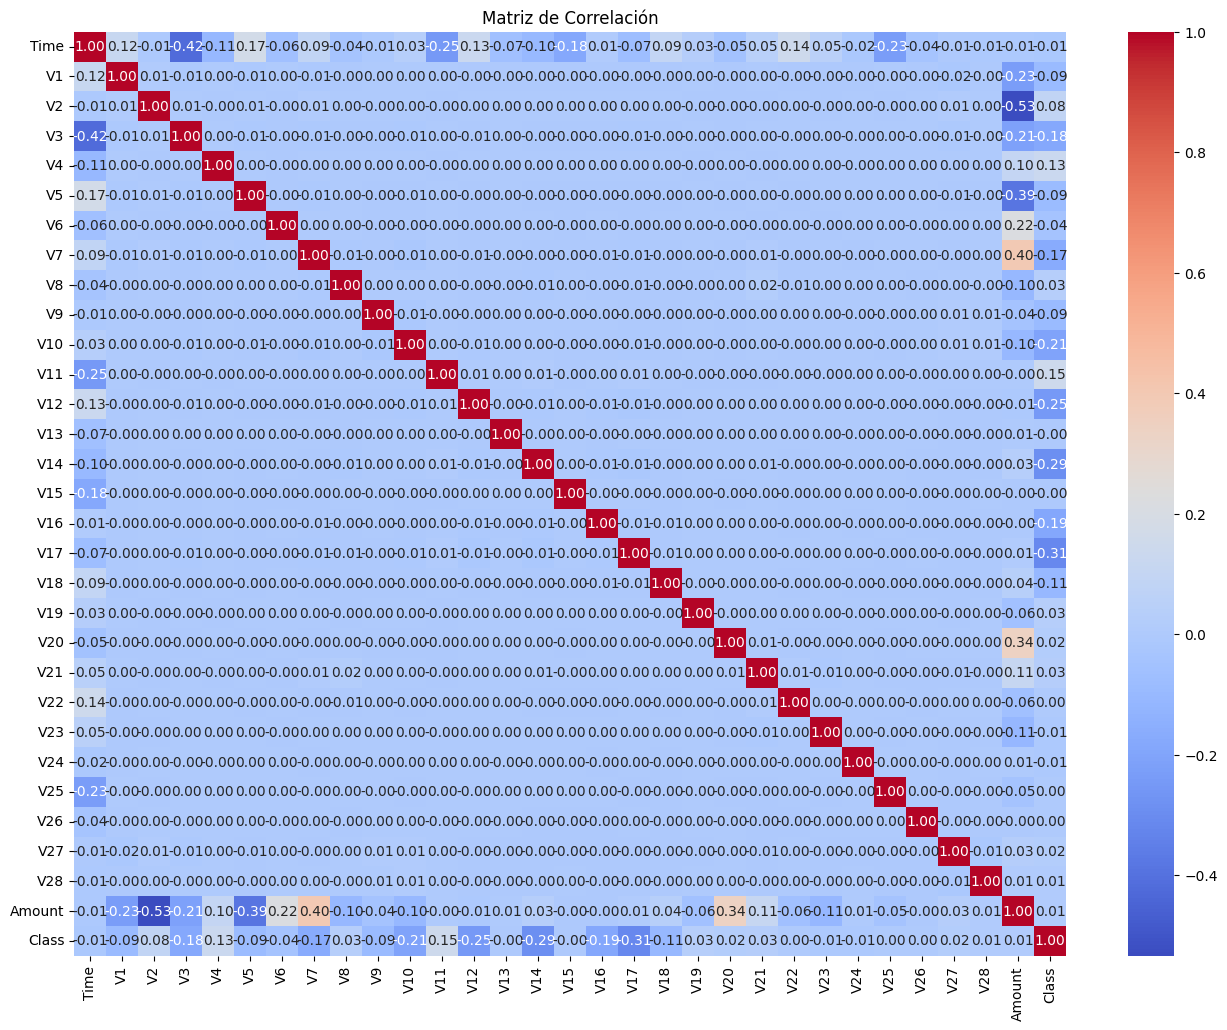


Correlación con la variable objetivo:
 Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


In [22]:
# 2. Relación entre características
correlation_matrix = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Correlación con la variable objetivo
corr_with_target = correlation_matrix['Class'].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo:\n", corr_with_target)

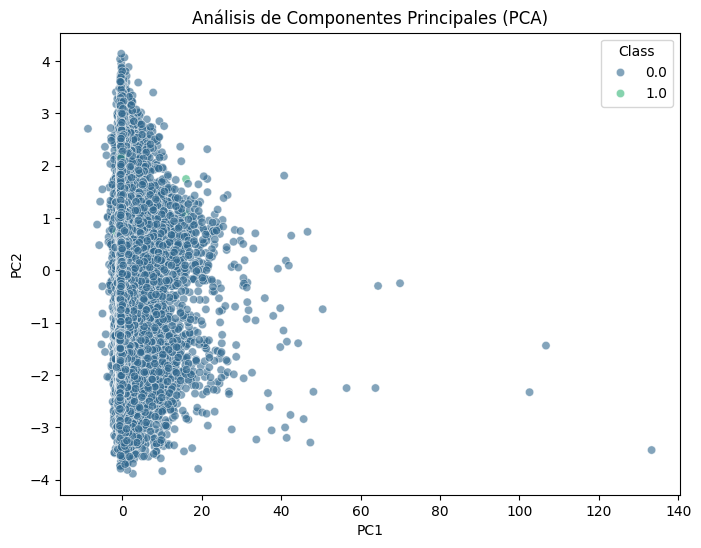

In [29]:
# 3. Análisis de características principales (PCA)
features = data.drop(columns=['Class'])
features_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, data[['Class']]], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='viridis', alpha=0.6)
plt.title('Análisis de Componentes Principales (PCA)')
plt.show()

In [31]:
# 4. Análisis de variables categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Class', palette='viridis')
    plt.title(f'Distribución de {col} por Clase')
    plt.show()


En este caso como no hay variables categoricas no hace falta ejecutar esta celda

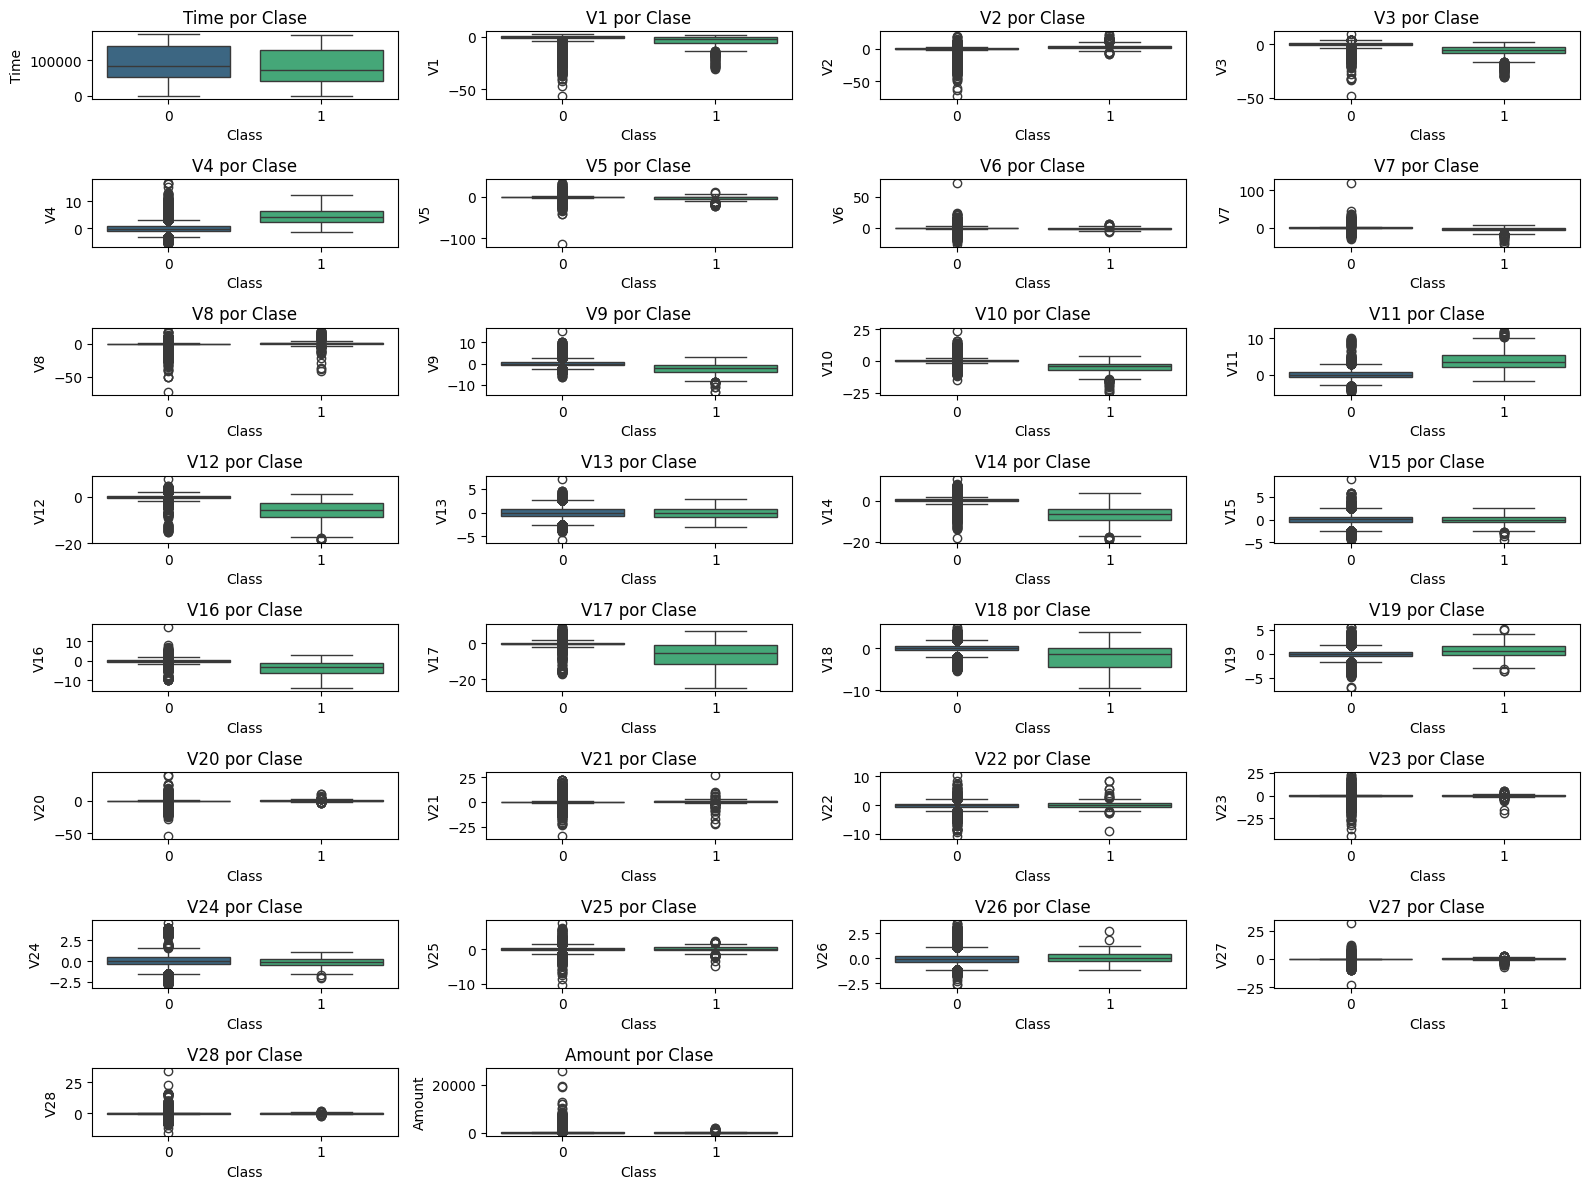

In [37]:
# 5. Visualización de anomalías y outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(8, 4, i)
    sns.boxplot(x='Class', y=column, data=data, palette='viridis')
    plt.title(f'{column} por Clase')
plt.tight_layout()
plt.show()

Análisis de las Gráficas

Al observar las gráficas de la imagen adjunta, podemos identificar algunos patrones y posibles outliers:

Distribución del Tiempo (Time por Clase):

No hay una diferencia clara en la variable Time entre las clases fraudulentas (1) y no fraudulentas (0). Esto sugiere que el tiempo de la transacción no es un fuerte indicador de fraude.

Variables Transformadas (V1-V28):

Varias variables transformadas (especialmente V4, V11, V12, V14, V16, V17, V18) muestran diferencias significativas en la mediana y la dispersión entre las clases 0 y 1. Estas diferencias pueden ser útiles para construir un modelo de detección de fraude.

Por ejemplo, V11 tiene valores más altos en la clase fraudulenta, mientras que V14 tiene valores más bajos. Estas variables pueden ser importantes en la predicción del fraude.
Montos de las Transacciones (Amount por Clase):

La variable Amount muestra que los montos de las transacciones fraudulentas tienden a ser ligeramente mayores en algunos casos, aunque hay mucha superposición entre las dos clases.

Hay algunos outliers en los montos de las transacciones, especialmente en las transacciones no fraudulentas.
Outliers:

Muchas de las variables tienen outliers, indicados por los puntos que caen fuera de los bigotes de los boxplots. Esto es especialmente notable en las variables V1, V2, V3, V4, V10, V11, V12, V14, y Amount.

Estos outliers pueden representar transacciones inusuales que podrían ser fraudulentas o errores de entrada de datos.
Conclusión

Las gráficas muestran que algunas variables transformadas tienen diferencias notables entre las transacciones fraudulentas y no fraudulentas, lo cual es útil para la detección de fraude. Las diferencias en la mediana y la dispersión de estas variables pueden ayudar a construir modelos más precisos. Sin embargo, se debe tener cuidado con los outliers, ya que pueden afectar el rendimiento del modelo y deben ser tratados adecuadamente durante el preprocesamiento de datos.

Para finalizar guardamos el conjunto de datos con los cambios ya realizados para las siguientes Fases.

In [40]:
data.to_csv('../data/data_preprocesamiento.csv', index=False)